In [1]:
# This is the template for the submission. You can develop your algorithm in a regular Python script and copy the code here for submission.

# TEAM NAME ON KAGGLE
# "EXAMPLE_GROUP"

# GROUP NUMBER
# "group_XX"

# TEAM MEMBERS (E-MAIL, LEGI, KAGGLE USERNAME):
# "examplestudent1@ethz.ch", "12-345-678", "eXampl3stdNtone" 
# "examplestudent2@ethz.ch", "12-345-679", "xXexamplestudent2Xx"
# "examplestudent3@ethz.ch", "12-345-670", "mhealth_student_98"

In [17]:
from os import listdir
from os.path import isfile, join
import re

import pandas as pd
import numpy as np

# You may change the mhealth_activity module but your algorithm must support the original version
from mhealth_activity import Recording
import matplotlib.pyplot as plt

# For interactive graphs
# %matplotlib widget

In [3]:
# Get the path for all test traces
'''
dir_traces_test = 'data/test'
filenames_test = [join(dir_traces_test, f) for f in listdir(dir_traces_test) if isfile(join(dir_traces_test, f))]
filenames_test.sort()
recordings_test = []
for fn in filenames_test:
    rec = Recording(fn)
    match = re.search(r'(\d{3})\.pkl$', fn)
    if match:
        id = int(match.group(1))
        rec.id = id
    else:
        raise ValueError(f'Filename {fn} does not match expected format')
    recordings_test.append(rec)
'''
    
    
dir_traces_train = 'data/train'
filenames_train = [join(dir_traces_train, f) for f in listdir(dir_traces_train) if isfile(join(dir_traces_train, f))]
filenames_train.sort()
axs=ays=azs=gxs=gys=gzs=mxs=mys=mzs=temps=alts=paxs=pays=pazs=pgxs=pgys=pgzs=pmxs=pmys=pmzs=[]
for fn in filenames_train:
    rec = Recording(fn)
    #print(rec.data)
    axs.append(rec.data['ax'].values)
    ays.append(rec.data['ay'].values)
    azs.append(rec.data['az'].values)
    gxs.append(rec.data['gx'].values)
    gys.append(rec.data['gy'].values)
    gzs.append(rec.data['gz'].values)
    mxs.append(rec.data['mx'].values)
    mys.append(rec.data['my'].values)
    mzs.append(rec.data['mz'].values)
    temps.append(rec.data['temperature'].values)
    alts.append(rec.data['altitude'].values)
    paxs.append(rec.data['phone_ax'].values)
    pays.append(rec.data['phone_ay'].values)
    pazs.append(rec.data['phone_az'].values)
    pgxs.append(rec.data['phone_gx'].values)
    pgys.append(rec.data['phone_gy'].values)
    pgzs.append(rec.data['phone_gz'].values)
    pmxs.append(rec.data['phone_mx'].values)
    pmys.append(rec.data['phone_my'].values)
    pmzs.append(rec.data['phone_mz'].values)

In [66]:
from scipy.signal import argrelextrema
def centered_moving_average(data, window_size):
    ret = np.cumsum(data, dtype=float)
    ret[window_size:] = ret[window_size:] - ret[:-window_size]
    return ret[window_size - 1:] / window_size
def plot_array(arr):
    plt.figure(figsize=(25, 3))
    plt.plot(arr)
    plt.show()

def windowed_peak_detection(data, window_size):
    # Initialize an empty list to store the peaks
    peaks = []

    # Divide the data into windows
    for i in range(0, len(data), window_size):
        window = data[i:i + window_size]

        # Compute the relative maxima of the window
        window_peaks = argrelextrema(window, np.greater)

        # Add the indices of the peaks to the list
        peaks.extend(window_peaks[0] + i)

    return np.array(peaks)

def get_steps_from_peaks(data, peaks, threshold=1.25):
    steps=0
    for peak in peaks:
        if data[peak]>threshold:
            steps+=1
    return steps

In [85]:
rec = Recording(filenames_train[0])
fnshuff = np.random.permutation(filenames_train)
for fn in fnshuff:
    rec = Recording(fn)
    if not (rec.labels['step_count'] == None):
        break

rec

Recording(filename='train_trace_313.pkl', labels={'path_idx': 2, 'activities': [0, 1, 3], 'step_count': 286, 'watch_loc': 2}, data={'altitude': Trace(title='altitude', total_time=520.69, samplerate=12.49, max_update_gap=261.72), 'ax': Trace(title='ax', total_time=520.69, samplerate=199.83, max_update_gap=0.17), 'ay': Trace(title='ay', total_time=520.69, samplerate=199.83, max_update_gap=0.19), 'az': Trace(title='az', total_time=520.69, samplerate=199.83, max_update_gap=0.04), 'bearing': Trace(title='bearing', total_time=520.69, samplerate=12.49, max_update_gap=261.72), 'gx': Trace(title='gx', total_time=520.69, samplerate=199.83, max_update_gap=0.05), 'gy': Trace(title='gy', total_time=520.69, samplerate=199.83, max_update_gap=0.04), 'gz': Trace(title='gz', total_time=520.69, samplerate=199.83, max_update_gap=0.05), 'latitude': Trace(title='latitude', total_time=520.69, samplerate=12.49, max_update_gap=261.72), 'longitude': Trace(title='longitude', total_time=520.69, samplerate=12.49, 

Trace(title='phone_ax', total_time=520.69, samplerate=52.17, max_update_gap=26.89)


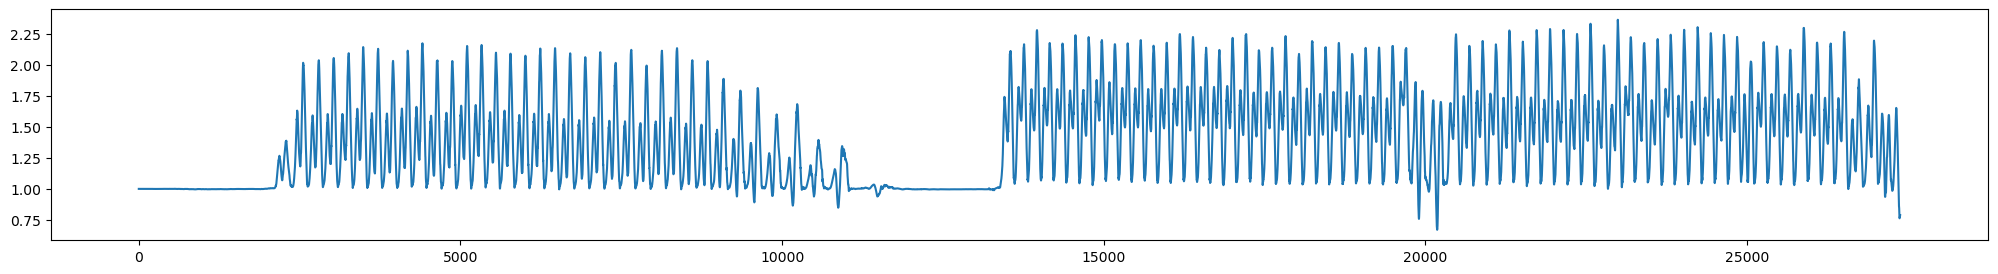

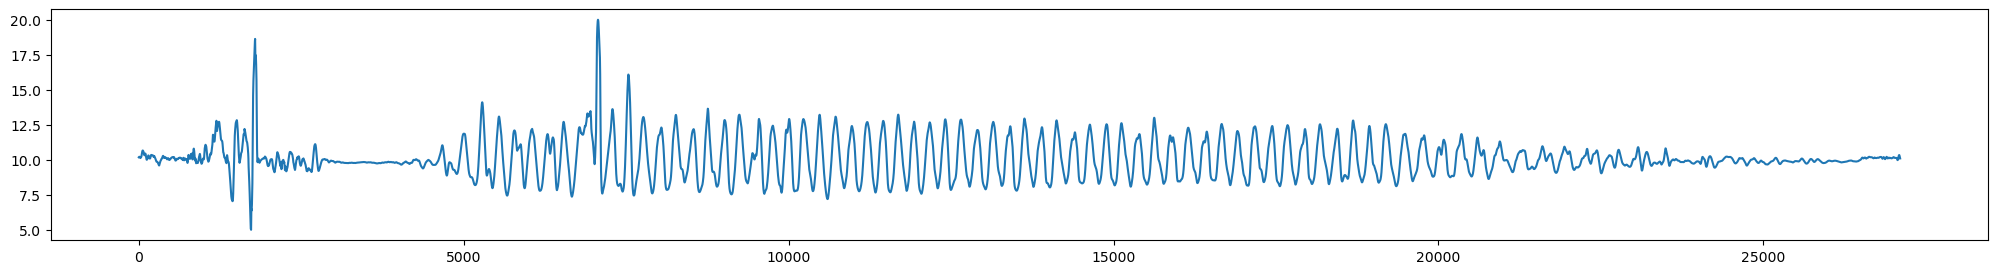

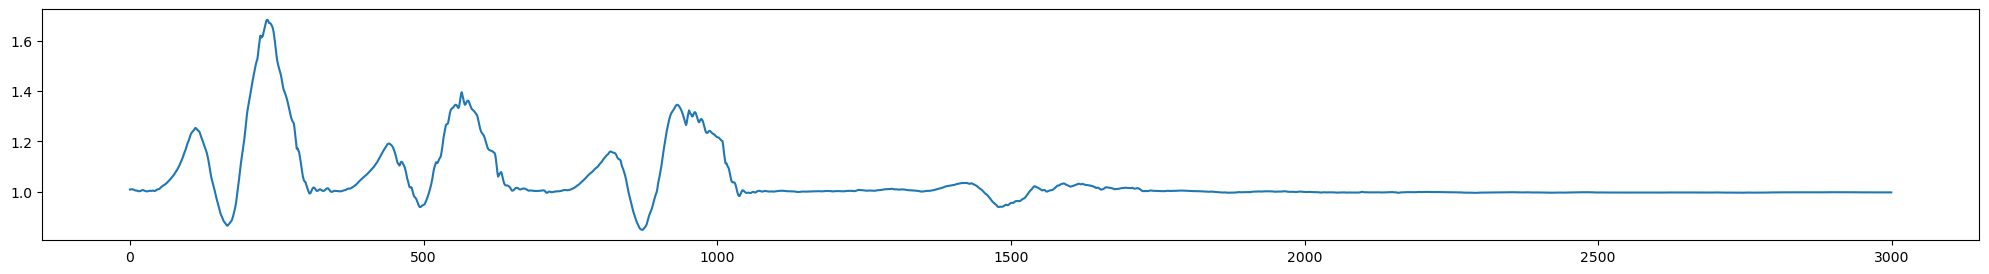

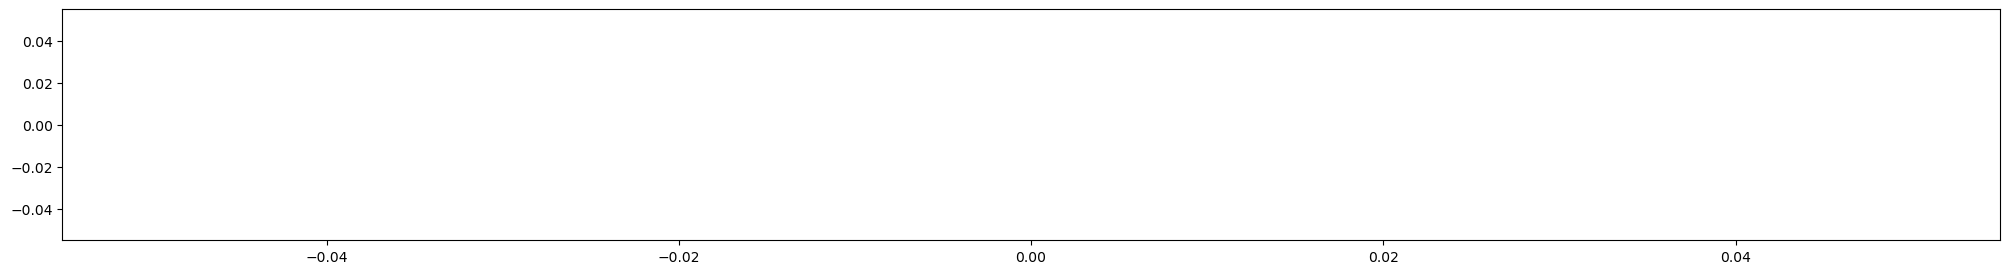

208


In [87]:

print(rec.data['phone_ax'])
acc_mag = np.sqrt(rec.data['ax'].values**2 + rec.data['ay'].values**2 + rec.data['az'].values**2)
cen_mov_avg = centered_moving_average(acc_mag, 62)
acc_mag_phone = np.sqrt(rec.data['phone_ax'].values**2 + rec.data['phone_ay'].values**2 + rec.data['phone_az'].values**2)
cen_mov_avg_phone = centered_moving_average(acc_mag_phone, 62)
peaks = windowed_peak_detection(cen_mov_avg, 118)
plot_array(cen_mov_avg[:])
plot_array(cen_mov_avg_phone[:])
plot_array(cen_mov_avg[10000:13000])
plot_array(cen_mov_avg[40000:42000])
print(get_steps_from_peaks(cen_mov_avg, peaks, 1.7))


In [4]:

'''pd.DataFrame(axs).to_csv('axs.csv')
axs = 0
pd.DataFrame(ays).to_csv('ays.csv')
ays = 0
pd.DataFrame(azs).to_csv('azs.csv')
azs = 0
pd.DataFrame(gxs).to_csv('gxs.csv')
gxs = 0
pd.DataFrame(gys).to_csv('gys.csv')
gys = 0
pd.DataFrame(gzs).to_csv('gzs.csv')
gzs = 0
pd.DataFrame(mxs).to_csv('mxs.csv')
mxs = 0
pd.DataFrame(mys).to_csv('mys.csv')
mys = 0
pd.DataFrame(mzs).to_csv('mzs.csv')
mzs = 0
pd.DataFrame(temps).to_csv('temps.csv')
temps = 0
pd.DataFrame(alts).to_csv('alts.csv')
alts = 0
pd.DataFrame(paxs).to_csv('paxs.csv')
paxs = 0
pd.DataFrame(pays).to_csv('pays.csv')
pays = 0
pd.DataFrame(pazs).to_csv('pazs.csv')
pazs = 0
pd.DataFrame(pgxs).to_csv('pgxs.csv')
pgxs = 0
pd.DataFrame(pgys).to_csv('pgys.csv')
pgys = 0
pd.DataFrame(pgzs).to_csv('pgzs.csv')
pgzs = 0
pd.DataFrame(pmxs).to_csv('pmxs.csv')
pmxs = 0
pd.DataFrame(pmys).to_csv('pmys.csv')
pmys = 0
pd.DataFrame(pmzs).to_csv('pmzs.csv')
pmzs = 0'''

"pd.DataFrame(axs).to_csv('axs.csv')\naxs = 0\npd.DataFrame(ays).to_csv('ays.csv')\nays = 0\npd.DataFrame(azs).to_csv('azs.csv')\nazs = 0\npd.DataFrame(gxs).to_csv('gxs.csv')\ngxs = 0\npd.DataFrame(gys).to_csv('gys.csv')\ngys = 0\npd.DataFrame(gzs).to_csv('gzs.csv')\ngzs = 0\npd.DataFrame(mxs).to_csv('mxs.csv')\nmxs = 0\npd.DataFrame(mys).to_csv('mys.csv')\nmys = 0\npd.DataFrame(mzs).to_csv('mzs.csv')\nmzs = 0\npd.DataFrame(temps).to_csv('temps.csv')\ntemps = 0\npd.DataFrame(alts).to_csv('alts.csv')\nalts = 0\npd.DataFrame(paxs).to_csv('paxs.csv')\npaxs = 0\npd.DataFrame(pays).to_csv('pays.csv')\npays = 0\npd.DataFrame(pazs).to_csv('pazs.csv')\npazs = 0\npd.DataFrame(pgxs).to_csv('pgxs.csv')\npgxs = 0\npd.DataFrame(pgys).to_csv('pgys.csv')\npgys = 0\npd.DataFrame(pgzs).to_csv('pgzs.csv')\npgzs = 0\npd.DataFrame(pmxs).to_csv('pmxs.csv')\npmxs = 0\npd.DataFrame(pmys).to_csv('pmys.csv')\npmys = 0\npd.DataFrame(pmzs).to_csv('pmzs.csv')\npmzs = 0"

In [5]:
# Loop through all filenames to process recordings
filenames_test = []
submission = []
for filename in filenames_test:
    recording = Recording(filename)
    
    # Assumes filename format ends with a three-digit ID before ".pkl"
    match = re.search(r'(\d{3})\.pkl$', filename)
    if match:
        id = int(match.group(1))
        recording.id = id
    else:
        raise ValueError(f'Filename {filename} does not match expected format')

    # Placeholder for the algorithm to process the recording
    # Implement the logic to infer watch location, path index, step count,
    # and activities (standing, walking, running, cycling) here.
    # Ensure your algorithm is tolerant to missing data and does not crash
    # when optional smartphone data traces are missing.

    path_idx = 0  # Integer, path in {0, 1, 2, 3, 4}
    watch_loc = 0  # Integer, 0: left wrist, 1: belt, 2: right ankle
    standing = False  # Boolean, True if participant was standing still throughout the recording
    walking = False  # Boolean, True if participant was walking throughout the recording
    running = False  # Boolean, True if participant was running throughout the recording
    cycling = False  # Boolean, True if participant was cycling throughout the recording
    step_count = 0  # Integer, number of steps, must be provided for each recording

    predictions = {
        'Id': id, 
        'watch_loc': watch_loc, 
        'path_idx': path_idx,
        'standing': standing,
        'walking': walking,
        'running': running,
        'cycling': cycling,
        'step_count': step_count
        }

    submission.append(predictions)

In [6]:
# Write the predicted values into a .csv file to then upload the .csv file to Kaggle
# When cross-checking the .csv file on your computer, we recommend using a text editor and NOT excel so that the results are displayed correctly
# IMPORTANT: Do NOT change the name of the columns of the .csv file ("Id", "watch_loc", "path_idx", "standing", "walking", "running", "cycling", "step_count")
submission_df = pd.DataFrame(submission, columns=['Id', 'watch_loc', 'path_idx', 'standing', 'walking', 'running', 'cycling', 'step_count'])
submission_df.to_csv('submission.csv', index=False)